__Алгоритм Прима__

Нужен для определения минимального остова графа

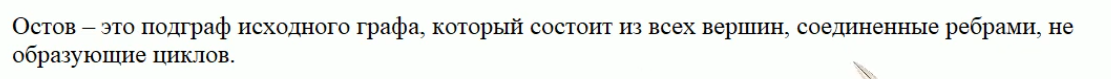

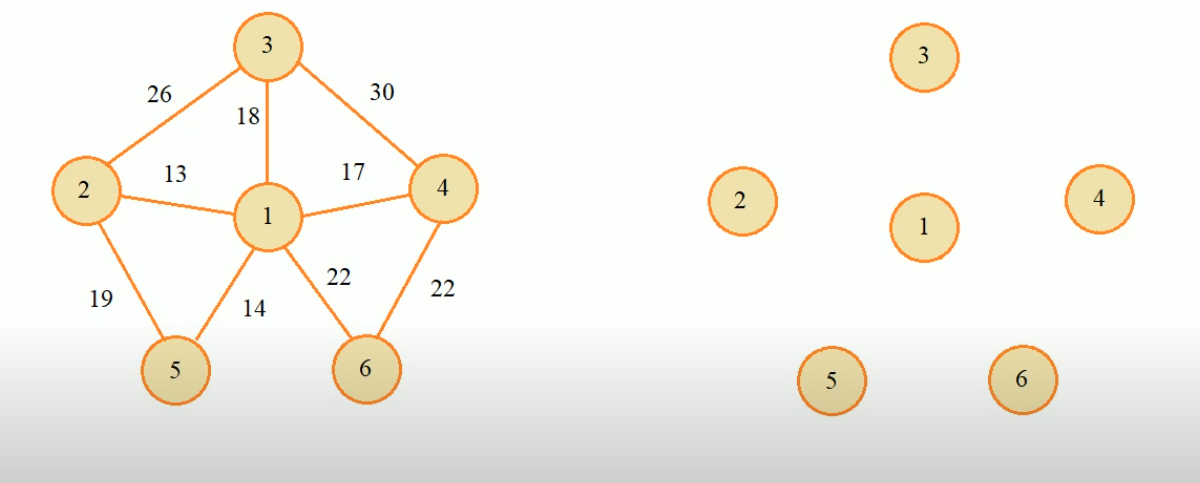

Идея проста:

Выбираем основную вершину и далее выбираем ребро с минимальным весом (в данном случае 2)

На следующей итерации тоже самое, но теперь выбираем ребра с минимальным весом, которые связаны или с первой, или со второй вершиной

И так далее

Но нельзя образовывать циклы

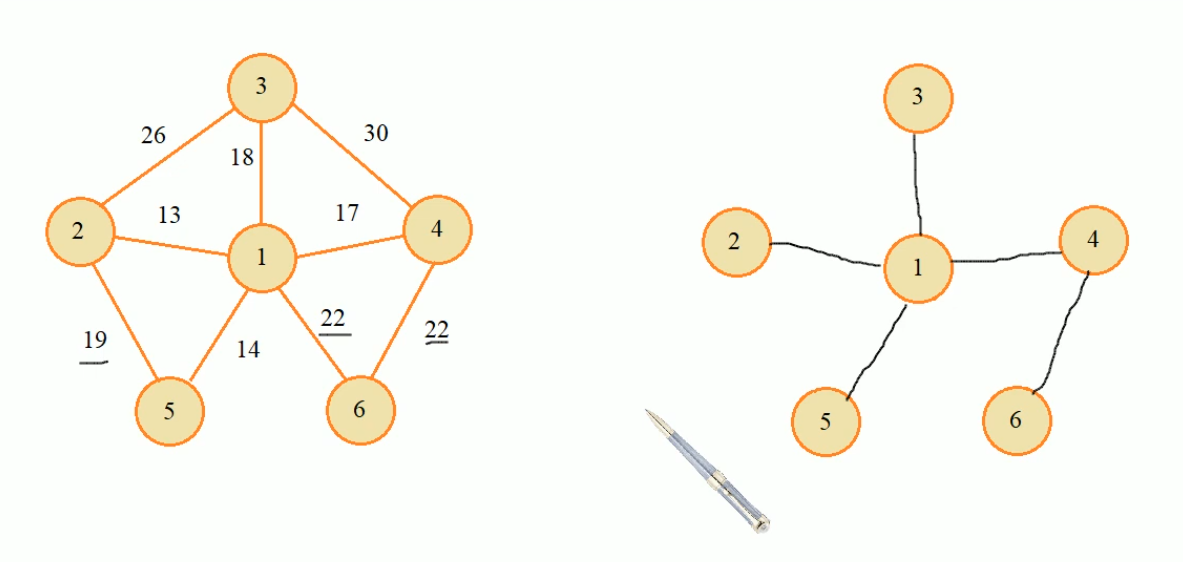

In [1]:
import heapq

# This class represents a directed graph using adjacency list representation


class Graph:
    def __init__(self, V):
        self.V = V
        self.adj = [[] for _ in range(V)]

    # Function to add an edge to the graph
    def add_edge(self, u, v, w):
        self.adj[u].append((v, w))
        self.adj[v].append((u, w))

    # Function to print MST using Prim's algorithm
    def prim_mst(self):
        pq = []  # Priority queue to store vertices that are being processed
        src = 0  # Taking vertex 0 as the source

        # Create a list for keys and initialize all keys as infinite (INF)
        key = [float('inf')] * self.V

        # To store the parent array which, in turn, stores MST
        parent = [-1] * self.V

        # To keep track of vertices included in MST
        in_mst = [False] * self.V

        # Insert source itself into the priority queue and initialize its key as 0
        heapq.heappush(pq, (0, src))
        key[src] = 0

        # Loop until the priority queue becomes empty
        while pq:
            # The first vertex in the pair is the minimum key vertex
            # Extract it from the priority queue
            # The vertex label is stored in the second of the pair
            u = heapq.heappop(pq)[1]

            # Different key values for the same vertex may exist in the priority queue.
            # The one with the least key value is always processed first.
            # Therefore, ignore the rest.
            if in_mst[u]:
                continue

            in_mst[u] = True  # Include the vertex in MST

            # Iterate through all adjacent vertices of a vertex
            for v, weight in self.adj[u]:
                # If v is not in MST and the weight of (u, v) is smaller than the current key of v
                if not in_mst[v] and key[v] > weight:
                    # Update the key of v
                    key[v] = weight
                    heapq.heappush(pq, (key[v], v))
                    parent[v] = u

        # Print edges of MST using the parent array
        for i in range(1, self.V):
            print(f"{parent[i]} - {i}")


# Driver program to test methods of the graph class
if __name__ == "__main__":
    # Create the graph given in the above figure
    V = 5
    g = Graph(V)

    (0, 1, 2), (0, 3, 6), (1, 2, 3), (1, 3, 8), (1, 4, 5), (2, 4, 7), (3, 4, 9)
    g.add_edge(0, 1, 2)
    g.add_edge(0, 3, 6)
    g.add_edge(1, 2, 3)
    g.add_edge(1, 3, 8)
    g.add_edge(1, 4, 5)
    g.add_edge(2, 4, 7)
    g.add_edge(3, 4, 9)

    g.prim_mst()

0 - 1
1 - 2
0 - 3
1 - 4
